In [63]:
import pickle
import os
import scipy.io as sio
import numpy as np
from TVDCondat2013 import TVD
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter

In [1]:
data_file = open('e24', 'rb')
data = pickle.load(data_file)
print(data.shape)
all_data_file = open('TF_data', 'rb')
all_data = pickle.load(data_file)
print(data.shape)

NameError: name 'pickle' is not defined

In [64]:
def getEmbeddedData(data, dim=2):
    '''
    data: np.array
        Time series values
    dim: int
        Dimension for delay embedding
    '''
    numpts = len(data) - (dim-1)
    pts = [[data[i+j] for j in range(dim)] for i in range(numpts)]
    return np.array(pts)

def movingAverage(data, window=20):
    return np.convolve(data, np.ones(window), mode='valid')/window

def load_matlab(folder: str, file_name: str, key: str) -> np.ndarray:
    """
    Read in a Matlab file and parse data out of it

    :param folder:      location of Matlab file
    :param file_name:   Matlab file name
    :param key:         key to portion of Matlab content
    :return:
    """
    full_path = os.path.join(folder, file_name)
    mat_contents = sio.loadmat(full_path)
    data = mat_contents[key]
    return data

In [15]:
X = getEmbeddedData(data)

In [16]:
print(X)

[[-0.3762 -0.3703]
 [-0.3703 -0.3671]
 [-0.3671 -0.3671]
 ...
 [-0.6362 -0.6361]
 [-0.6361 -0.6385]
 [-0.6385 -0.6351]]


In [29]:
lbd = 2.5  # denoising parameter, see https://github.com/bgailleton/TVD_Condat2013
denoised = TVD(data, lbd)
sig = 60
gdenoised = gaussian_filter(data, sig)

(85981,)


In [18]:
Y = getEmbeddedData(denoised)
print(Y)

[[-0.40967401 -0.40967401]
 [-0.40967401 -0.40967401]
 [-0.40967401 -0.40967401]
 ...
 [-0.66323304 -0.66323304]
 [-0.66323304 -0.66323304]
 [-0.66323304 -0.66323304]]


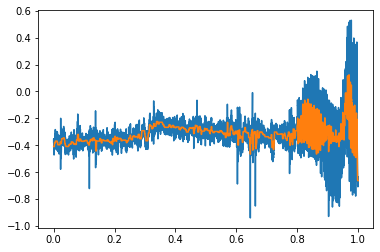

In [19]:
N = len(data)
t = np.linspace(0, 1, N + 1)[0:N]
plt.plot(t, data)
plt.plot(t, denoised)
plt.show()

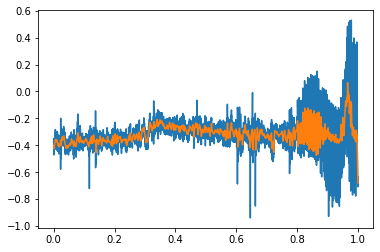

In [20]:
plt.plot(t, data)
plt.plot(t, gdenoised)
plt.show()

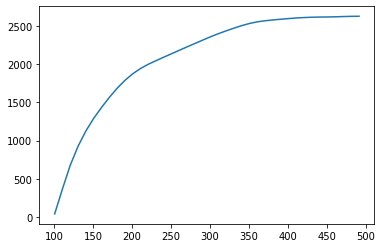

In [52]:
w0, w1 = 100, 500
mdenoised = movingAverage(data, w0)
ww, ss = [], []
for w in range(w0+1, w1+1, 10):
    current = movingAverage(data, w)
    s = sum([np.abs(current[i]-mdenoised[i+1]) for i in range(len(current))])
    ww.append(w)
    ss.append(s)
plt.plot(ww, ss)
plt.show()


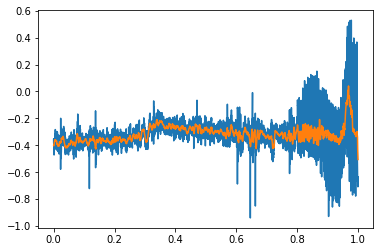

In [59]:
N = len(data)
t = np.linspace(0, 1, N + 1)[0:N]
plt.plot(t, data)
mdenoised = movingAverage(data, 350)
N = len(mdenoised)
t = np.linspace(0, 1, N + 1)[0:N]
plt.plot(t, mdenoised)
plt.show()

In [101]:
# Patient NA, raw data
na_data = load_matlab("/Users/ilirdema/uoft/uhn/2020/rawdata/NA/EEG_MAT", "NA_d1_sz2.mat", "matrix_bi")
print(na_data.shape)

(93500, 31)


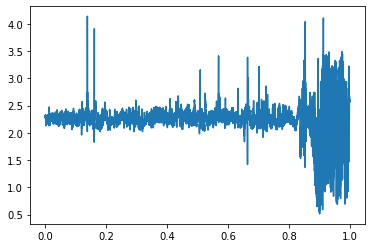

In [110]:
numdata = na_data.shape[0]
t = np.linspace(0, 1, numdata+1)[0: numdata]
plt.plot(t, na_data[:, 1])
plt.show()

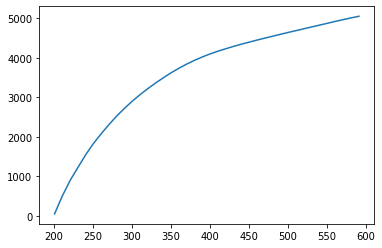

In [111]:
w0, w1 = 200, 600
mdenoised = movingAverage(na_data[:, 1], w0)
ww, ss = [], []
for w in range(w0+1, w1+1, 10):
    current = movingAverage(na_data[:, 1], w)
    s = sum([np.abs(current[i]-mdenoised[i+1]) for i in range(len(current))])
    ww.append(w)
    ss.append(s)
plt.plot(ww, ss)
plt.show()

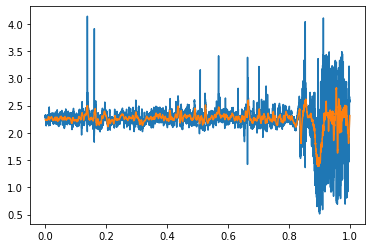

In [112]:
t = np.linspace(0, 1, numdata + 1)[0:numdata]
plt.plot(t, na_data[:, 1])
mdenoised = movingAverage(na_data[:, 1], 350)
N = len(mdenoised)
t = np.linspace(0, 1, N + 1)[0:N]
plt.plot(t, mdenoised)
plt.show()